# The Financial Instrument
This Class analyses the financial instruments eg stocks etc. Any stock
can be selected and can be analysed using the functions provided by the
class or using pandas and numpy libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
class FinancialInstrument():
    """
    A Class to analyze any Financial Instrument e.g. stock, etc.
    Uses yfinance to download the data for a stock, pandas and numpy to do arithmetic operations
    on it and matplotlib to visualize the stock data
    :param ticker: The ticker of the stock whose price shall be downloaded. e.g. for Infosys India it would be "INFY.NS" where INFY is the name of the stock and NS is for NSE stock market.
    :param start: The start date from which the stock prices shall be downloaded in format "YYYY-MM-DD"
    :param end: The end date till which the stock prices shall be downloaded in format "YYYY-MM-DD"
    """
    def __init__(self,ticker: str,interval: str,start=None,end=None,period=None):
        """

        :param ticker: The ticker of the stock whose price shall be downloaded. e.g. for Infosys India it would be "INFY.NS" where INFY is the name of the stock and NS is for NSE stock market.
        :param start: The start date from which the stock prices shall be downloaded in format "YYYY-MM-DD"
        :param end: The end date till which the stock prices shall be downloaded in format "YYYY-MM-DD"

        """
        self._ticker = ticker
        self.start = start
        self.end = end
        self.interval = interval
        self.period = period
        self.get_data()
        self.log_returns()

    def __repr__(self):
        return f"FinancialInstrument(ticker={self._ticker}, start={self.start},end={self.end}),period={self.period}"

    def get_data(self):
        """
        Downloads data from yfinance
        :return: A dataframe with price and log_returns columns of the ticker the class is initialized with.
        """
        if self.period==None:
            self.data = yf.download(self._ticker,self.start,self.end,interval=self.interval).Close.to_frame()
        else:
            self.data = yf.download(self._ticker,period=self.period,interval=self.interval).Close.to_frame()

        self.data.rename(columns={'Close': 'price'},inplace = True)

    def log_returns(self,horizon=1):
        """
        Adds a column log_returns to self.data which contains the daily log_returns of the
        stock price.
        :param: Horizon: the horizon for which the returns are to be calculated
        """
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(horizon))

    def plot_prices(self):
        """
        Plots the line chart of the prices of stock
        """
        self.data.price.plot(figsize=(12,8))
        plt.title(f"Price Chart: {self._ticker}", fontsize=15)

    def plot_returns(self,kind='ts'):
        """
        Plots the returns for a given stock
        :param kind: 'ts' for line chart else 'hist' for histogram
        """

        if kind=='ts':
            self.data.log_returns.plot(figsize=(12,8))
            plt.title(f"Returns: {self._ticker}",fontsize=15)
        elif kind=='hist':
            self.data.log_returns.hist(figsize=(12,8),bins=int(np.sqrt(len(self.data))))
            plt.title(f"Frequency of Returns: {self._ticker}",fontsize=15)

    def set_ticker(self, ticker=None):
        """
        Changes the default ticker to new one
        :param ticker: Ticker of the stock to be changed
        """
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

        else:
            print("Give the name of the ticker to change to.")

    def mean_returns(self,freq=None):
        """
        Calculates the mean returns of the returns
        :param freq: the frequency for stock price if it is None then the mean of all prices is calculated.
        :return: returns the mean of log returns of the stock price
        """
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_price = np.log(resampled_price / resampled_price.shift(1))
            return resampled_price.mean()

    def std_returns(self,freq=None):
        """
        Calculates the standard deviation / risk percentage of stock prices
        :param freq: the frequency for a stock price if it is None then the standard deviation of all prices is calculated
        else it is calculated for a stipulated freq value
        :return: returns the standard deviation of the stock price
        """
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_price = np.log(resampled_price / resampled_price.shift(1))
            return resampled_price.std()


    def annualized_returns(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk_return = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print(f"Returns : {mean_return} | Risk : {risk_return}")




In [4]:
infy_stock = FinancialInstrument(ticker='TATAMOTORS.NS',start='2011-01-01',end=pd.Timestamp.today(),interval=
                                 '1d')

[*********************100%***********************]  1 of 1 completed


In [7]:
infy_stock

FinancialInstrument(ticker=TATAMOTORS.NS, start=2011-02-01,end=2023-03-16 11:23:58.354680),period=None

In [8]:
infy_stock.data

,price,log_returns
Date,,
2011-02-01 00:00:00+05:30,211.541016,NaN
2011-02-02 00:00:00+05:30,220.485077,0.041411
2011-02-03 00:00:00+05:30,228.904770,0.037476
2011-02-04 00:00:00+05:30,227.727402,-0.005157
2011-02-07 00:00:00+05:30,226.836945,-0.003918
...,...,...
2023-03-09 00:00:00+05:30,432.200012,-0.016294
2023-03-10 00:00:00+05:30,435.850006,0.008410
2023-03-13 00:00:00+05:30,422.399994,-0.031345


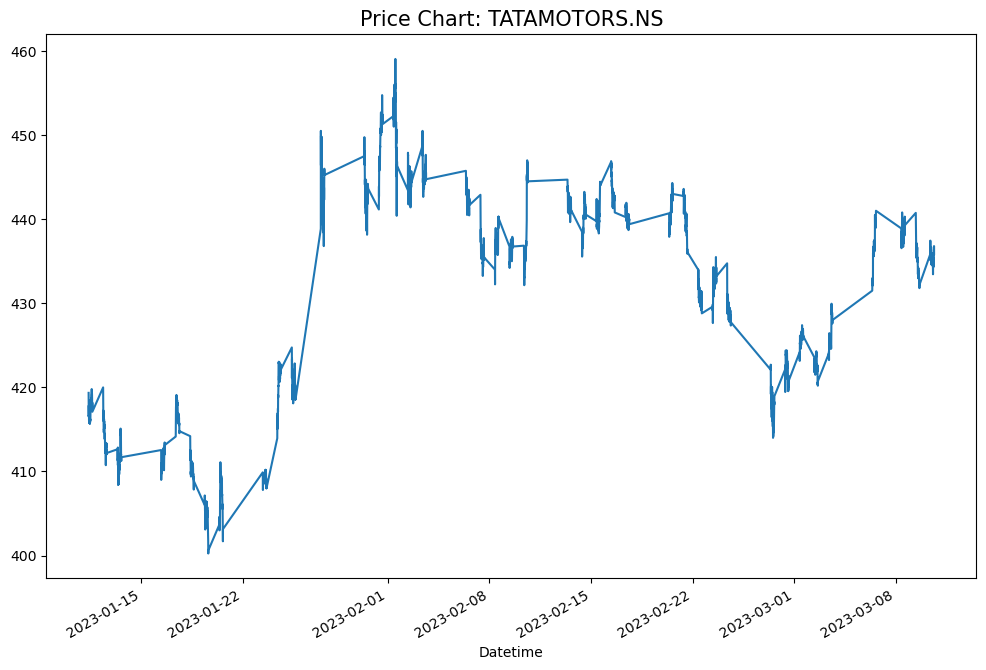

In [52]:
infy_stock.plot_prices()

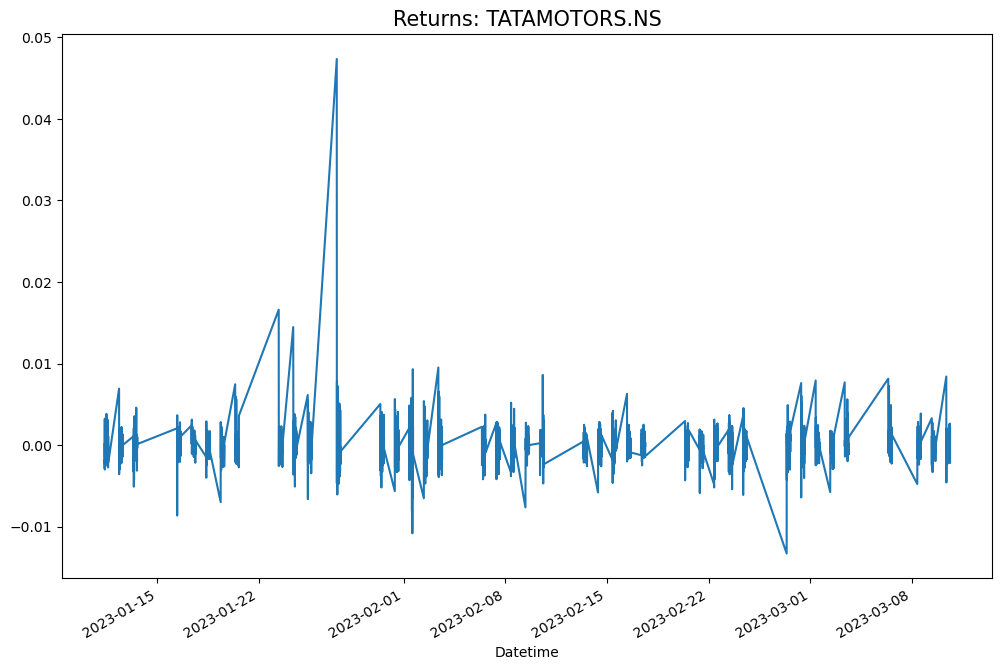

In [53]:
infy_stock.plot_returns(kind='ts')

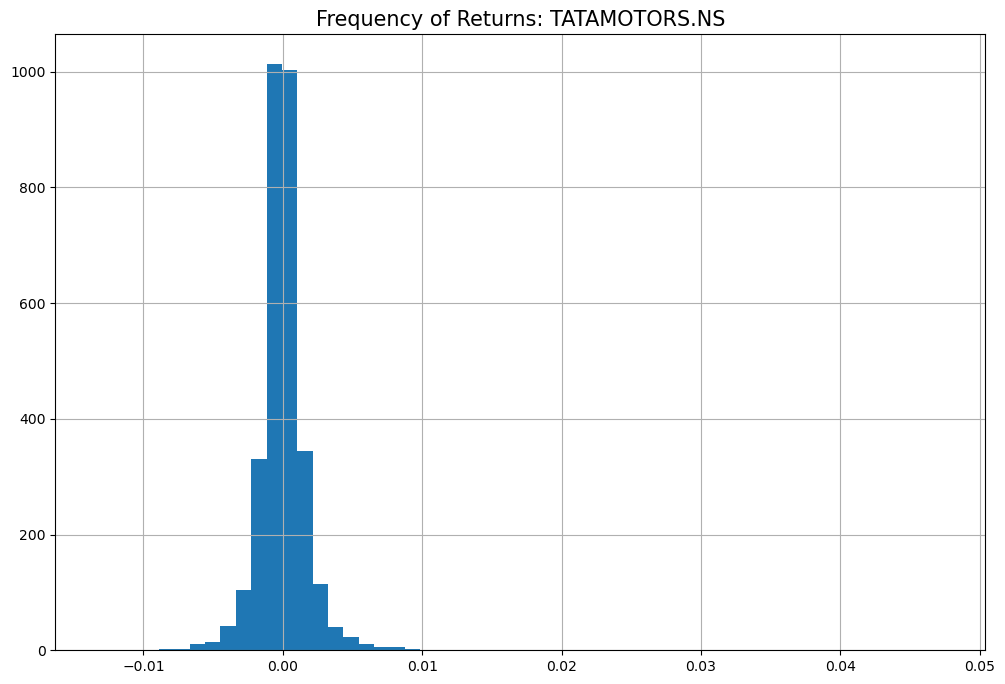

In [54]:
infy_stock.plot_returns(kind='hist')

In [55]:
infy_stock.mean_returns()

1.2550326333711749e-05

In [56]:
infy_stock.std_returns()

0.0019432643940892954

In [42]:
infy_stock.annualized_returns()

Returns : 0.011 | Risk : 0.055


In [57]:
infy_stock.data.log_returns.sum()

0.03859225347616363

In [58]:
np.exp(infy_stock.data.log_returns.sum())

1.0393466072727942

In [59]:
price = infy_stock.data.price
price[-1] / price[0]

1.0393466072727968

In [5]:
infy_stock.data.log_returns[-252:].cumsum().apply(np.exp)

Date
2022-03-14 00:00:00+05:30    0.984575
2022-03-15 00:00:00+05:30    0.989238
2022-03-16 00:00:00+05:30    1.016143
2022-03-17 00:00:00+05:30    1.037427
2022-03-21 00:00:00+05:30    1.023437
                               ...   
2023-03-10 00:00:00+05:30    1.042329
2023-03-13 00:00:00+05:30    1.010164
2023-03-14 00:00:00+05:30    0.996413
2023-03-15 00:00:00+05:30    0.983738
2023-03-16 00:00:00+05:30    0.994141
Name: log_returns, Length: 252, dtype: float64

In [60]:
np.exp(infy_stock.data.loc['2023-02'].log_returns.apply(lambda x: x if x>0 else 0).sum())

2.258062317551077

In [61]:
infy_stock.data.loc['2023-02']

,price,log_returns
Datetime,,
2023-02-01 09:15:00+05:30,452.250000,0.002103
2023-02-01 09:20:00+05:30,454.450012,0.004853
2023-02-01 09:25:00+05:30,452.500000,-0.004300
2023-02-01 09:30:00+05:30,451.850006,-0.001437
2023-02-01 09:35:00+05:30,452.149994,0.000664
...,...,...
2023-02-28 15:05:00+05:30,420.950012,-0.000950
2023-02-28 15:10:00+05:30,420.799988,-0.000356
2023-02-28 15:15:00+05:30,420.600006,-0.000475


In [4]:
infy_stock

FinancialInstrument(ticker=TATAMOTORS.NS, start=2011-01-01,end=2023-03-14 19:25:37.679045),period=None

In [6]:
data = infy_stock.data

In [11]:
data

,price,log_returns
Date,,
2011-02-01 00:00:00+05:30,211.541016,NaN
2011-02-02 00:00:00+05:30,220.485077,0.041411
2011-02-03 00:00:00+05:30,228.904770,0.037476
2011-02-04 00:00:00+05:30,227.727402,-0.005157
2011-02-07 00:00:00+05:30,226.836945,-0.003918
...,...,...
2023-03-09 00:00:00+05:30,432.200012,-0.016294
2023-03-10 00:00:00+05:30,435.850006,0.008410
2023-03-13 00:00:00+05:30,422.399994,-0.031345


In [181]:
# transaction cost calculation for zerodha trading acc
data

,price,log_returns
Date,,
2011-02-01 00:00:00+05:30,211.541016,NaN
2011-02-02 00:00:00+05:30,220.485077,0.041411
2011-02-03 00:00:00+05:30,228.904770,0.037476
2011-02-04 00:00:00+05:30,227.727402,-0.005157
2011-02-07 00:00:00+05:30,226.836945,-0.003918
...,...,...
2023-03-09 00:00:00+05:30,432.200012,-0.016294
2023-03-10 00:00:00+05:30,435.850006,0.008410
2023-03-13 00:00:00+05:30,422.399994,-0.031345


In [182]:
p_data = data[0:200].price.copy()
stratx = []
for x in range(len(p_data)-20):
    strat = []
    for i in range(x,x+20):
        qty = 3
        turnover = qty*(p_data.iloc[i] + p_data.iloc[x])
        stt = round(0.1*turnover/100)
        txn_nse = round(0.00345*turnover/100,2)
        gst = round(18/100*txn_nse,2)
        stamp = round(0.015/100*qty*p_data.iloc[x])
        dp = 15.94
        tax = stt+txn_nse+gst+stamp+dp
        if p_data.iloc[i]>p_data.iloc[x]:
            pnl = qty*(p_data.iloc[i] - p_data.iloc[x]) - tax
            if pnl>0:
                strat.append(1)
            else:
                strat.append(0)
        elif p_data.iloc[i]<p_data.iloc[x]:
            pnl = qty*(p_data.iloc[i] - p_data.iloc[x]) + tax
            if pnl>0:
                strat.append(0)
            else:
                strat.append(-1)

    n_zero = 0
    for i in strat:
        if i!=0:
            n_zero=1
            stratx.append(i)
            break
        else:
            pass
    if n_zero==0:
        stratx.append(0)


In [183]:
pd.Series(stratx)

0      1
1      1
2     -1
3     -1
4     -1
      ..
175    1
176   -1
177    1
178   -1
179    1
Length: 180, dtype: int64

In [184]:
straty = [stratx[0]]
for i in range(1,len(stratx)):
    if stratx[i]==stratx[i-1]:
        straty.append(0)
    else:
        straty.append(stratx[i])

stratz = straty+ [None]*20
stratz = np.array(stratz)

In [185]:
p_data.loc[stratz==-1]

Date
2011-02-03 00:00:00+05:30    228.904770
2011-02-15 00:00:00+05:30    244.843811
2011-03-03 00:00:00+05:30    232.802948
2011-03-08 00:00:00+05:30    229.963409
2011-03-16 00:00:00+05:30    230.824173
2011-04-05 00:00:00+05:30    253.352539
2011-04-13 00:00:00+05:30    247.119400
2011-04-20 00:00:00+05:30    247.693237
2011-05-06 00:00:00+05:30    237.443192
2011-05-11 00:00:00+05:30    239.758347
2011-05-13 00:00:00+05:30    239.639618
2011-05-25 00:00:00+05:30    224.353577
2011-07-07 00:00:00+05:30    208.849869
2011-07-13 00:00:00+05:30    206.920563
2011-07-22 00:00:00+05:30    197.274033
2011-08-10 00:00:00+05:30    167.048233
2011-08-22 00:00:00+05:30    145.835770
2011-09-06 00:00:00+05:30    151.534637
2011-09-16 00:00:00+05:30    160.132416
2011-09-27 00:00:00+05:30    154.097153
2011-10-17 00:00:00+05:30    186.103851
2011-10-19 00:00:00+05:30    184.966049
Name: price, dtype: float64

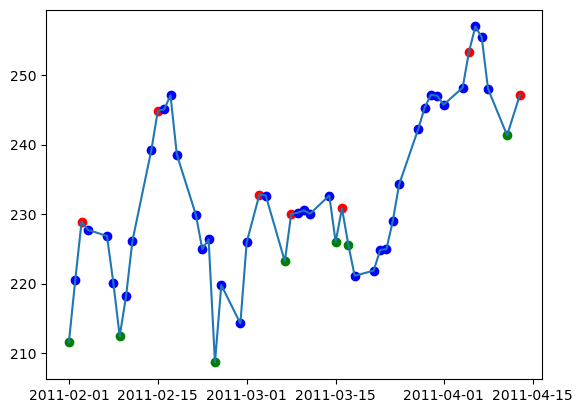

In [193]:
plt.plot(p_data[:50])
# plt.scatter(y=p_data,x=p_data.index)
plt.scatter(y=p_data[:50].loc[stratz[:50]==1],x=p_data[:50].loc[stratz[:50]==1].index,color='g')
plt.scatter(y=p_data[:50].loc[stratz[:50]==-1],x=p_data[:50].loc[stratz[:50]==-1].index,color='r')
plt.scatter(y=p_data[:50].loc[stratz[:50]==0],x=p_data[:50].loc[stratz[:50]==0].index,color='b')

In [9]:
p_data = data[:10].copy()

In [11]:
p_data.iloc[0]

price          258.912903
log_returns           NaN
Name: 2011-01-03 00:00:00+05:30, dtype: float64

In [7]:
data

,price,log_returns
Date,,
2011-01-03 00:00:00+05:30,258.912903,NaN
2011-01-04 00:00:00+05:30,256.924225,-0.007711
2011-01-05 00:00:00+05:30,253.837341,-0.012088
2011-01-06 00:00:00+05:30,249.523605,-0.017140
2011-01-07 00:00:00+05:30,235.513885,-0.057784
...,...,...
2023-03-10 00:00:00+05:30,435.850006,0.008410
2023-03-13 00:00:00+05:30,422.399994,-0.031345
2023-03-14 00:00:00+05:30,416.649994,-0.013706


In [18]:
# Considering that minimum number of quantities to be traded is 3
qty = 3
signal_dict = {}
for i in range(len(data)-7):
    price_on_day = data.price.iloc[i]
    for j in range(1,7):
        if f't+{j}' not in signal_dict.keys():
            signal_dict[f't+{j}'] = []
        f_price = data.price.iloc[i+j]
        turnover = qty*(price_on_day + f_price)
        stt = round(0.1*turnover/100)
        txn_nse = round(0.00345*turnover/100,2)
        gst = round(18/100*txn_nse,2)
        stamp = round(0.015/100*qty*data.price.iloc[i])
        dp = 15.94
        tax = stt+txn_nse+gst+stamp+dp
        s_pnl = f_price - price_on_day
        if s_pnl>0:
            pnl = s_pnl - tax
            if pnl>0:
                signal_dict[f't+{j}'].append(1)
            else:
                signal_dict[f't+{j}'].append(0)
        else:
            pnl = s_pnl + tax
            if pnl>0:
                signal_dict[f't+{j}'].append(0)
            else:
                signal_dict[f't+{j}'].append(-1)


In [21]:
for i in signal_dict.keys():
    data[i] = signal_dict[i]+[None]*7

In [25]:
for i in range(1,21):
    data[f't-{i}'] = data.log_returns.shift(i)

In [26]:
data

,price,log_returns,t+1,t+2,t+3,t+4,t+5,t+6,t-1,t-2,...,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03 00:00:00+05:30,258.912903,NaN,0.0,0.0,0.0,-1.0,-1.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 00:00:00+05:30,256.924225,-0.007711,0.0,0.0,-1.0,-1.0,-1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05 00:00:00+05:30,253.837341,-0.012088,0.0,-1.0,-1.0,-1.0,0.0,0.0,-0.007711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06 00:00:00+05:30,249.523605,-0.017140,0.0,0.0,-1.0,0.0,0.0,0.0,-0.012088,-0.007711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07 00:00:00+05:30,235.513885,-0.057784,0.0,0.0,0.0,0.0,0.0,0.0,-0.017140,-0.012088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00+05:30,435.850006,0.008410,NaN,NaN,NaN,NaN,NaN,NaN,-0.016294,-0.001819,...,-0.016283,-0.014781,0.007022,-0.003857,-0.005758,0.008138,-0.001134,-0.010824,0.020622,-0.007641
2023-03-13 00:00:00+05:30,422.399994,-0.031345,NaN,NaN,NaN,NaN,NaN,NaN,0.008410,-0.016294,...,0.008694,-0.016283,-0.014781,0.007022,-0.003857,-0.005758,0.008138,-0.001134,-0.010824,0.020622
2023-03-14 00:00:00+05:30,416.649994,-0.013706,NaN,NaN,NaN,NaN,NaN,NaN,-0.031345,0.008410,...,-0.012661,0.008694,-0.016283,-0.014781,0.007022,-0.003857,-0.005758,0.008138,-0.001134,-0.010824


In [27]:
data.dropna(inplace=True)

In [28]:
data

,price,log_returns,t+1,t+2,t+3,t+4,t+5,t+6,t-1,t-2,...,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-02 00:00:00+05:30,220.485077,0.041411,0.0,0.0,0.0,0.0,0.0,0.0,-0.070423,-0.002829,...,-0.003007,-0.044900,0.015236,0.050473,-0.015976,-0.011407,-0.057784,-0.017140,-0.012088,-0.007711
2011-02-03 00:00:00+05:30,228.904770,0.037476,0.0,0.0,0.0,0.0,0.0,0.0,0.041411,-0.070423,...,0.017407,-0.003007,-0.044900,0.015236,0.050473,-0.015976,-0.011407,-0.057784,-0.017140,-0.012088
2011-02-04 00:00:00+05:30,227.727402,-0.005157,0.0,0.0,0.0,0.0,0.0,0.0,0.037476,0.041411,...,-0.005685,0.017407,-0.003007,-0.044900,0.015236,0.050473,-0.015976,-0.011407,-0.057784,-0.017140
2011-02-07 00:00:00+05:30,226.836945,-0.003918,0.0,0.0,0.0,0.0,0.0,1.0,-0.005157,0.037476,...,0.001634,-0.005685,0.017407,-0.003007,-0.044900,0.015236,0.050473,-0.015976,-0.011407,-0.057784
2011-02-08 00:00:00+05:30,220.089325,-0.030198,0.0,0.0,0.0,1.0,1.0,1.0,-0.003918,-0.005157,...,-0.006129,0.001634,-0.005685,0.017407,-0.003007,-0.044900,0.015236,0.050473,-0.015976,-0.011407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 00:00:00+05:30,420.700012,0.006558,0.0,0.0,0.0,1.0,0.0,0.0,-0.023177,-0.012661,...,-0.010824,0.020622,-0.007641,0.010622,-0.014930,-0.007775,0.001460,-0.004151,-0.012128,0.018867
2023-03-01 00:00:00+05:30,426.000000,0.012519,0.0,0.0,0.0,0.0,0.0,0.0,0.006558,-0.023177,...,-0.001134,-0.010824,0.020622,-0.007641,0.010622,-0.014930,-0.007775,0.001460,-0.004151,-0.012128
2023-03-02 00:00:00+05:30,420.450012,-0.013114,0.0,1.0,0.0,0.0,0.0,0.0,0.012519,0.006558,...,0.008138,-0.001134,-0.010824,0.020622,-0.007641,0.010622,-0.014930,-0.007775,0.001460,-0.004151


In [30]:
ls = []
for k in range(-20,7):
    if k==0:
        key='log_returns'
    else:
        key = f't+{k}' if k>0 else f't{k}'
    ls.append(key)


In [31]:
ls

['t-20',
 't-19',
 't-18',
 't-17',
 't-16',
 't-15',
 't-14',
 't-13',
 't-12',
 't-11',
 't-10',
 't-9',
 't-8',
 't-7',
 't-6',
 't-5',
 't-4',
 't-3',
 't-2',
 't-1',
 'log_returns',
 't+1',
 't+2',
 't+3',
 't+4',
 't+5',
 't+6']

In [32]:
ls = ['price']+ls

In [33]:
ls

['price',
 't-20',
 't-19',
 't-18',
 't-17',
 't-16',
 't-15',
 't-14',
 't-13',
 't-12',
 't-11',
 't-10',
 't-9',
 't-8',
 't-7',
 't-6',
 't-5',
 't-4',
 't-3',
 't-2',
 't-1',
 'log_returns',
 't+1',
 't+2',
 't+3',
 't+4',
 't+5',
 't+6']

In [34]:
data[ls]

,price,t-20,t-19,t-18,t-17,t-16,t-15,t-14,t-13,t-12,...,t-3,t-2,t-1,log_returns,t+1,t+2,t+3,t+4,t+5,t+6
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-02 00:00:00+05:30,220.485077,-0.007711,-0.012088,-0.017140,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,...,-0.038834,-0.002829,-0.070423,0.041411,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-03 00:00:00+05:30,228.904770,-0.012088,-0.017140,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,...,-0.002829,-0.070423,0.041411,0.037476,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-04 00:00:00+05:30,227.727402,-0.017140,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,...,-0.070423,0.041411,0.037476,-0.005157,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-07 00:00:00+05:30,226.836945,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,-0.005685,...,0.041411,0.037476,-0.005157,-0.003918,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-08 00:00:00+05:30,220.089325,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,-0.005685,0.001634,...,0.037476,-0.005157,-0.003918,-0.030198,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 00:00:00+05:30,420.700012,0.018867,-0.012128,-0.004151,0.001460,-0.007775,-0.014930,0.010622,-0.007641,0.020622,...,0.008694,-0.012661,-0.023177,0.006558,0.0,0.0,0.0,1.0,0.0,0.0
2023-03-01 00:00:00+05:30,426.000000,-0.012128,-0.004151,0.001460,-0.007775,-0.014930,0.010622,-0.007641,0.020622,-0.010824,...,-0.012661,-0.023177,0.006558,0.012519,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-02 00:00:00+05:30,420.450012,-0.004151,0.001460,-0.007775,-0.014930,0.010622,-0.007641,0.020622,-0.010824,-0.001134,...,-0.023177,0.006558,0.012519,-0.013114,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
dataset = data[ls]